In [0]:
#UPLOAD TRAINSMALL.ZIP AND UNZIP THE DATASET. UNCOMMENT THE CODE BELOW.

In [0]:
#from google.colab import files
#uploaded = files.upload()

In [0]:
!unzip -q trainsmall.zip

In [0]:
#GDRIVEPATH='/content/drive/My Drive/ROOT/Work/UoN/CSY3025/dogs-vs-cats/'
GDRIVEPATH=''

In [0]:
import os, shutil

base_dir = GDRIVEPATH+'trainsmall'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [0]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
     print('data batch shape:', data_batch.shape)
     print('labels batch shape:', labels_batch.shape)
     break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)




Epoch 1/30





100/100 [==============================] - 25s 251ms/step - loss: 0.6917 - acc: 0.5285 - val_loss: 0.6781 - val_acc: 0.5890
Epoch 2/30
100/100 [==============================] - 9s 88ms/step - loss: 0.6560 - acc: 0.6110 - val_loss: 0.6366 - val_acc: 0.6310
Epoch 3/30
100/100 [==============================] - 9s 90ms/step - loss: 0.6081 - acc: 0.6700 - val_loss: 0.6529 - val_acc: 0.5930
Epoch 4/30
100/100 [==============================] - 9s 87ms/step - loss: 0.5662 - acc: 0.7075 - val_loss: 0.5791 - val_acc: 0.6960
Epoch 5/30
100/100 [==============================] - 9s 89ms/step - loss: 0.5240 - acc: 0.7480 - val_loss: 0.5621 - val_acc: 0.7050
Epoch 6/30
100/100 [==============================] - 9s 88ms/step - loss: 0.5029 - acc: 0.7475 - val_loss: 0.6110 - val_acc: 0.6730
Epoch 7/30
100/100 [==============================] - 9s 87ms/step - loss: 0.4796 - acc: 0.7750 - val_loss: 0.5604 - val_acc: 0.7180
Epoch 8/30
100/100 [==============================] - 9s 86

In [0]:
model.save(GDRIVEPATH+'cats_and_dogs_small_1.h5')

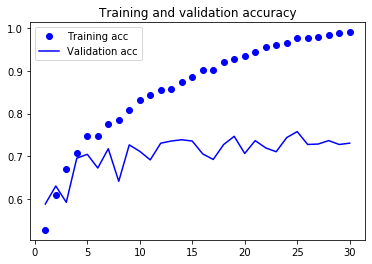

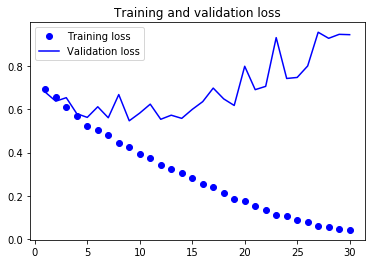

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()